First let's crop images from the ghibili dataset ...

First Dataset: https://www.kaggle.com/datasets/shubham1921/real-to-ghibli-image-dataset-5k-paired-images ...

In [1]:
import os
import cv2
import tqdm

input_folder = './data/trainB_ghibli'
output_folder = './data/final_trainB'

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)
cascade = cv2.CascadeClassifier('lbpcascade_animeface.xml')

nr_of_faces = 0
tqdm.tqdm.write("Starting face detection...")

# Iterate through all images in the input folder
for filename in tqdm.tqdm(os.listdir(input_folder), desc="Processing images", unit="image"):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(24, 24))
        for i, (x, y, w, h) in enumerate(faces):
            # Crop the face
            face = img[y:y+h, x:x+w]
            # Save the cropped face
            output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_face{i}.jpg")
            cv2.imwrite(output_path, face)
            nr_of_faces += 1
        
print(f"Total faces detected and saved: {nr_of_faces}")
print("Face detection and saving completed.")

Starting face detection...


Processing images: 100%|██████████| 2500/2500 [03:09<00:00, 13.19image/s]

Total faces detected and saved: 484
Face detection and saving completed.


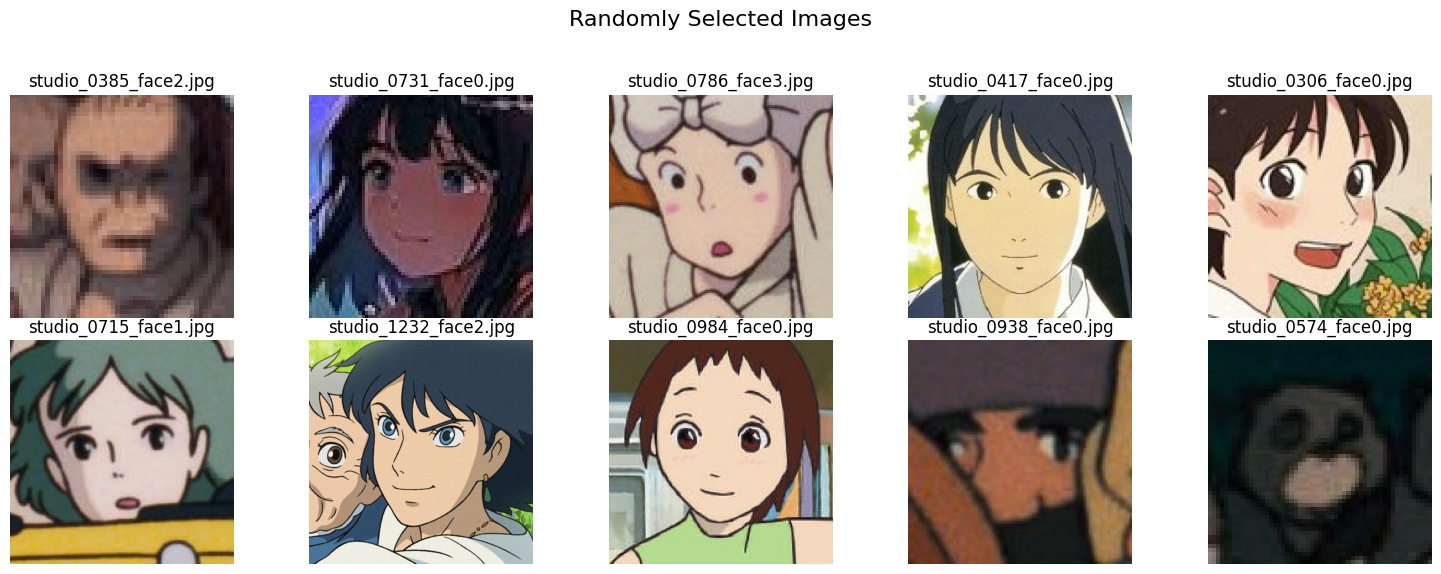

In [7]:
# lets plot some 10 random images from the generated dataset
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Set the path to the folder containing the images
folder_path = './data/final_trainB'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Randomly select 10 images
random_images = random.sample(image_files, 10)

# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Randomly Selected Images', fontsize=16)

# Flatten the axes array for easy iteration
# axes = axes.flatten()
axes = axes.ravel()

# Loop through the selected images and display them
for ax, img_file in zip(axes, random_images):
    # Read the image
    img_path = os.path.join(folder_path, img_file)
    img = mpimg.imread(img_path)
    
    # Display the image
    ax.imshow(img)
    ax.axis('off')  # Hide the axes
    ax.set_title(img_file)  # Set the title to the image file name

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Adjust spacing between subplots
plt.show()  # Show the plot